## Classification using KNN

In [1]:
# DAL Library
# version 2.1

source("../examples.R")

#loading DAL
load_dal() # see ../examples.R 

# needed for cla_classification
loadlibrary("ROCR")
loadlibrary("RSNNS")  
loadlibrary("nnet")  
loadlibrary("MLmetrics") 

# needed for cla_knn
loadlibrary("class")

Loading required package: dal

Warning message:
“replacing previous import ‘FNN::knn.cv’ by ‘class::knn.cv’ when loading ‘dal’”
Warning message:
“replacing previous import ‘FNN::knn’ by ‘class::knn’ when loading ‘dal’”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::combine’ by ‘randomForest::combine’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::lag’ by ‘stats::lag’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘stats::toeplitz’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::update’ by ‘stats::update’ when loading ‘dal’”

Attaching package: ‘dal’


The following object is masked from ‘package:sta

In [2]:
iris <- datasets::iris
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
#extracting the levels for the dataset
slevels <- levels(iris$Species)
slevels

[1] "setosa"     "versicolor" "virginica"

In [4]:
#for performance issues, you can use matrix instead of data.frame (uncomment next line to test)
#iris <- cbind(as.matrix(iris[,1:4]), Species=iris$Species)

## Building samples (training and testing)

In [5]:
# preparing dataset for random sampling
set.seed(1)
sr <- sample_random()
sr <- train_test(sr, iris)
iris_train = sr$train
iris_test = sr$test

In [6]:
tbl <- rbind(table(iris[,"Species"]), 
             table(iris_train[,"Species"]), 
             table(iris_test[,"Species"]))
rownames(tbl) <- c("dataset", "training", "test")
head(tbl)

,setosa,versicolor,virginica
dataset,50,50,50
training,39,38,43
test,11,12,7


### Model training

In [7]:
model <- cla_knn("Species", slevels, k=1)
print(describe(model))
model <- fit(model, iris_train)
train_prediction <- predict(model, iris_train)
  
iris_train_predictand = decodeClassLabels(iris_train[,"Species"])
train_eval <- evaluation.classification(iris_train_predictand, train_prediction)
print(train_eval$metrics)

[1] "cla_knn"


k=1,0.000



  accuracy f1 sensitivity specificity precision recall
1        1  1           1           1         1      1


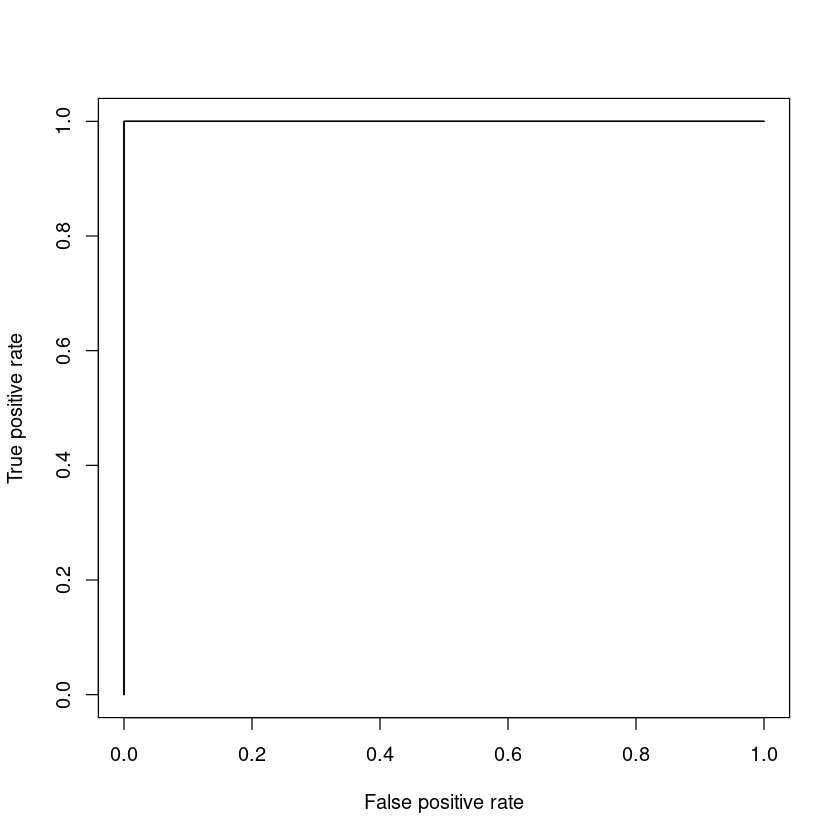

In [8]:
rc <- roc_curve(iris_train_predictand, train_prediction)
plot(rc)

### Model testing

   accuracy        f1 sensitivity specificity precision    recall
1 0.9555556 0.9333333   0.9333333   0.9666667 0.9333333 0.9333333


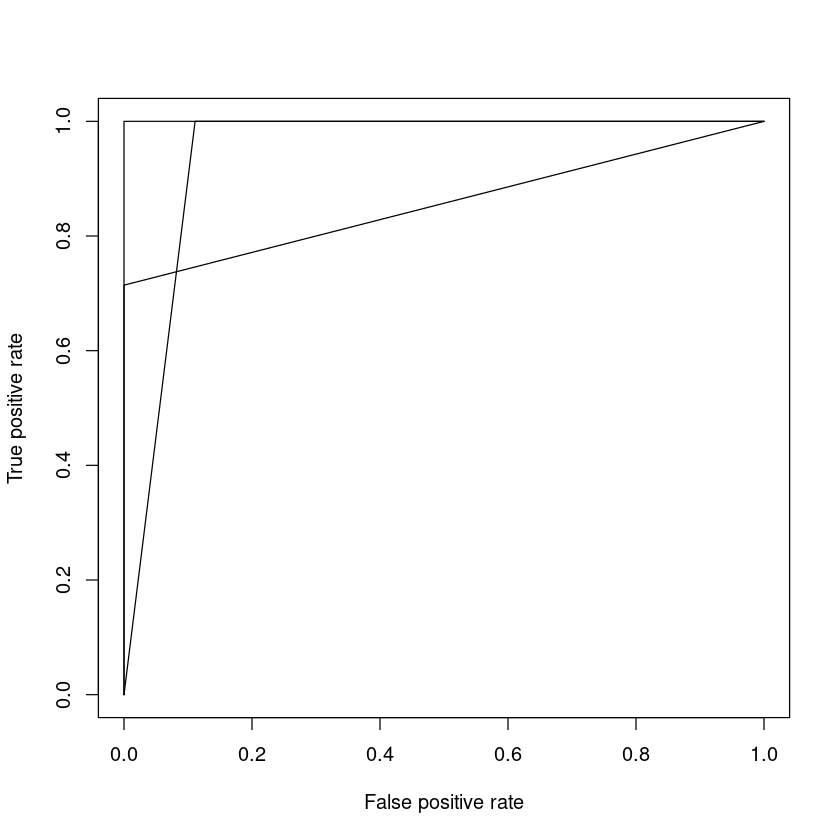

In [9]:
# Test  
test_prediction <- predict(model, iris_test)
  
iris_test_predictand = decodeClassLabels(iris_test[,"Species"])
test_eval <- evaluation.classification(iris_test_predictand, test_prediction)
print(test_eval$metrics)
rc <-roc_curve(iris_test_predictand, test_prediction) 
plot(rc)